Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

[1] 5.85

[1] 21.14

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


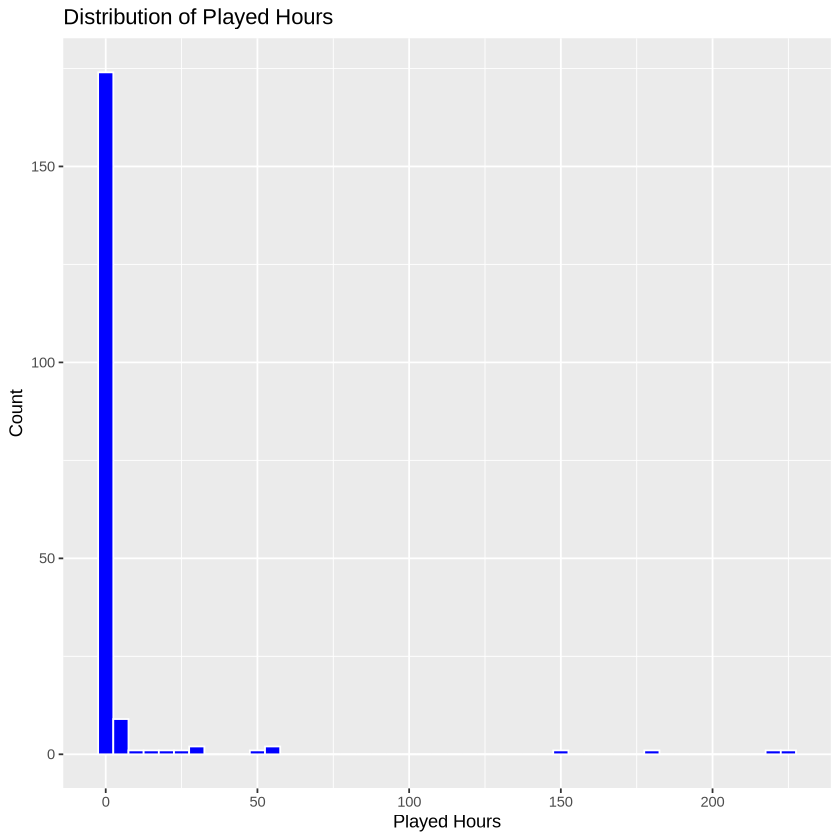

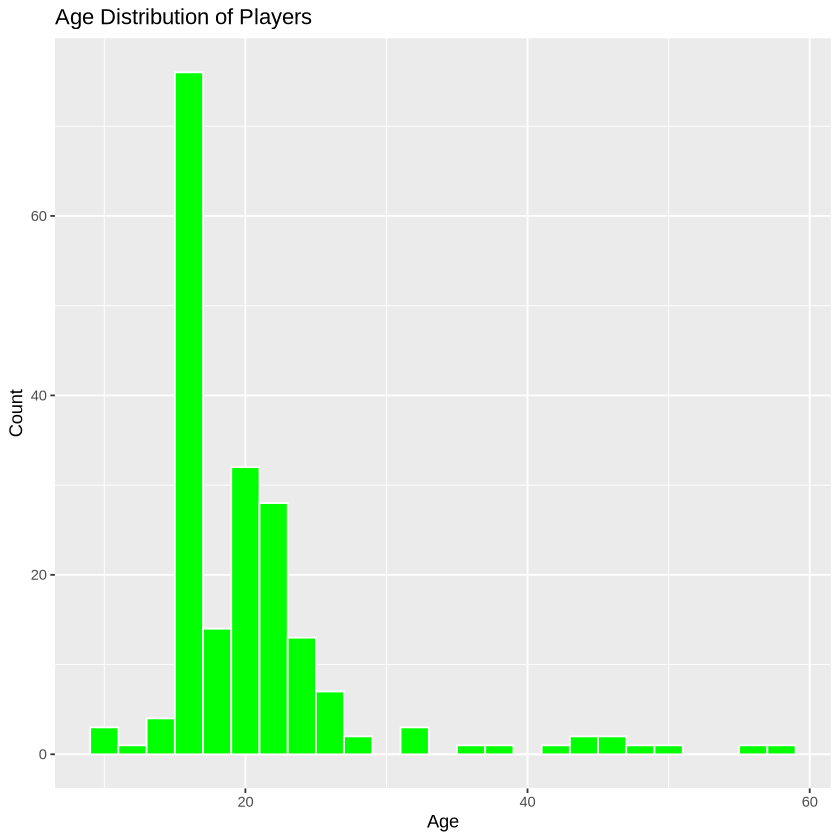

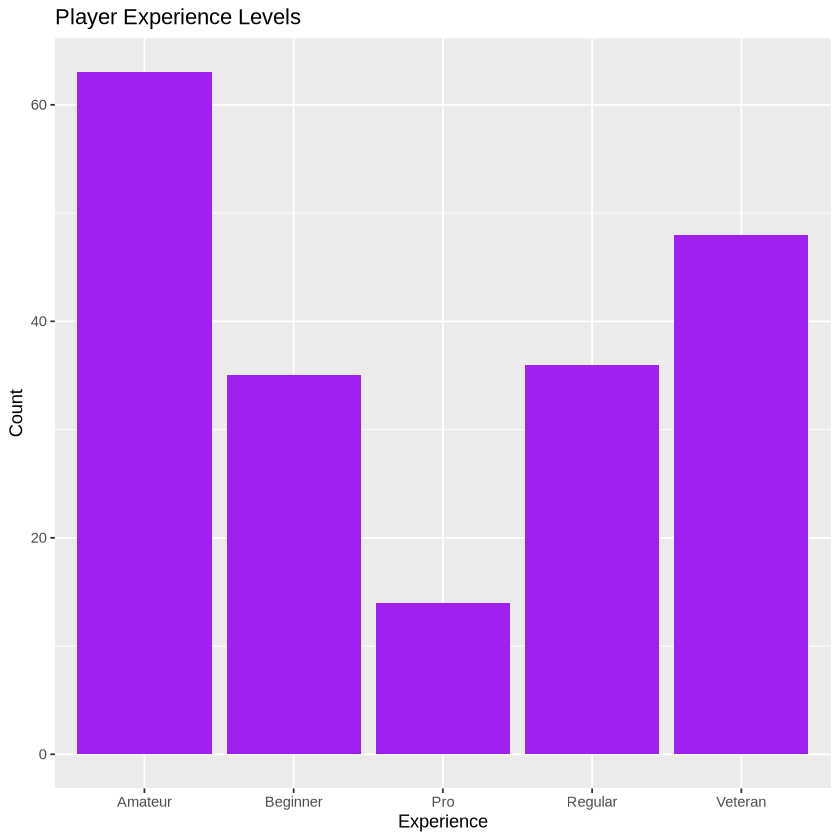

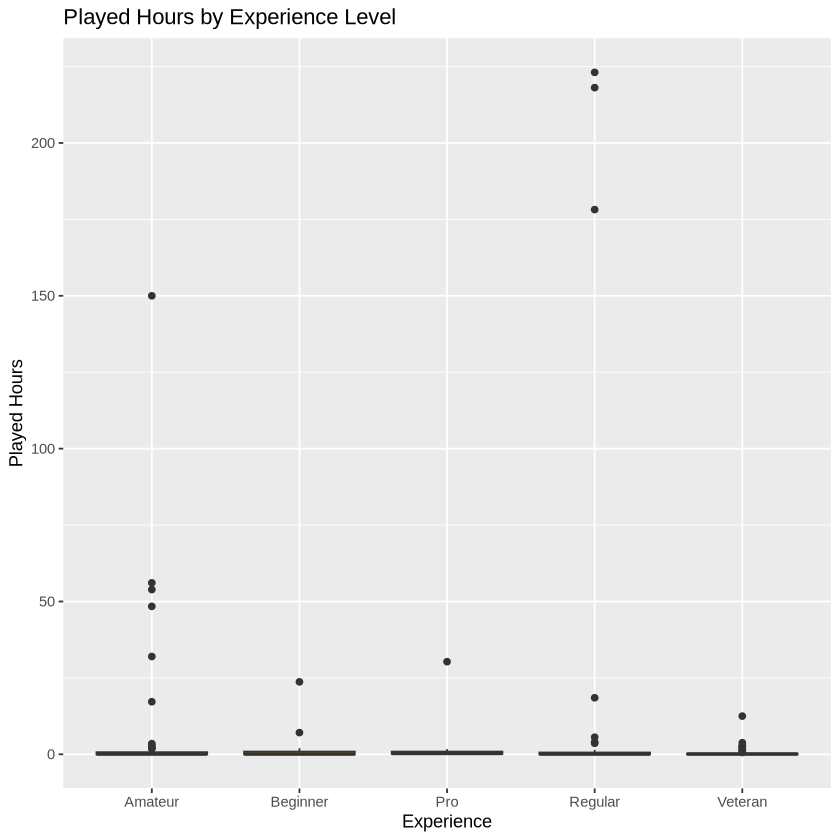

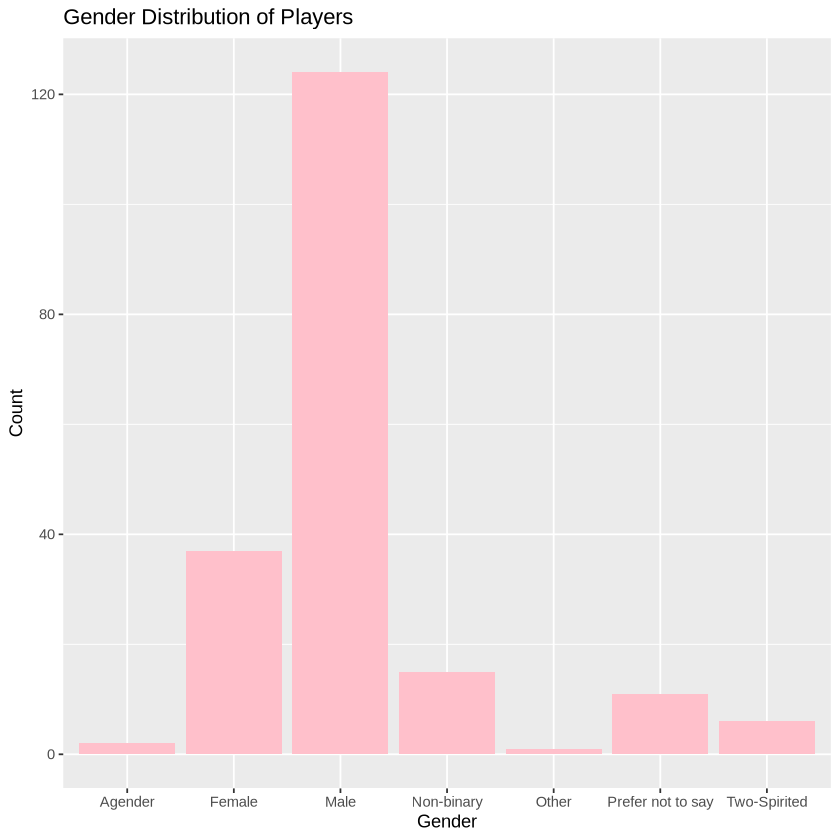

In [3]:
library(tidyverse)
library(lubridate)

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

glimpse(players)
glimpse(sessions)

mean_played_hours <- mean(players$played_hours, na.rm = TRUE)
mean_played_hours <- round(mean_played_hours, 2)
mean_played_hours

mean_age <- mean(players$Age, na.rm = TRUE)
mean_age <- round(mean_age, 2)
mean_age

sessions_tidy <- sessions |>
  mutate(
    start_time = as_datetime(original_start_time, origin = "1970-01-01")
  )

sessions_tidy <- sessions_tidy |>
  mutate(
    end_time = as_datetime(original_end_time, origin = "1970-01-01")
  )

sessions_tidy <- sessions_tidy |>
  mutate(
    duration_mins = as.numeric(difftime(end_time, start_time, units = "mins"))
  )

player_sessions_summary <- sessions_tidy |>
  group_by(hashedEmail) |>
  summarise(
    total_sessions = n()
  )

player_sessions_summary <- player_sessions_summary |>
  left_join(
    sessions_tidy |>
      group_by(hashedEmail) |>
      summarise(total_duration = sum(duration_mins, na.rm = TRUE)),
    by = "hashedEmail"
  )

player_sessions_summary <- player_sessions_summary |>
  left_join(
    sessions_tidy |>
      group_by(hashedEmail) |>
      summarise(mean_duration = mean(duration_mins, na.rm = TRUE)),
    by = "hashedEmail"
  )

players_full <- players |>
  left_join(player_sessions_summary, by = "hashedEmail")

ggplot(players_full, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "white") +
  labs(title = "Distribution of Played Hours",
       x = "Played Hours", y = "Count")

ggplot(players_full, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "green", color = "white") +
  labs(title = "Age Distribution of Players",
       x = "Age", y = "Count")

ggplot(players_full, aes(x = experience)) +
  geom_bar(fill = "purple") +
  labs(title = "Player Experience Levels",
       x = "Experience", y = "Count")

ggplot(players_full, aes(x = experience, y = played_hours)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Played Hours by Experience Level",
       x = "Experience", y = "Played Hours")

ggplot(players_full, aes(x = gender)) +
  geom_bar(fill = "pink") +
  labs(title = "Gender Distribution of Players",
       x = "Gender", y = "Count")
